In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tflearn

In [2]:
# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data()

image_dim = 784 # 28*28 pixels
z_dim = 200 # Noise data points
total_samples = len(X)


# Generator
def generator(x, reuse=False):
    with tf.variable_scope('Generator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, image_dim, activation='sigmoid')
        return x


# Discriminator
def discriminator(x, reuse=False):
    with tf.variable_scope('Discriminator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, 1, activation='sigmoid')
        return x

# Build Networks
gen_input = tflearn.input_data(shape=[None, z_dim], name='input_noise')
disc_input = tflearn.input_data(shape=[None, 784], name='disc_input')

gen_sample = generator(gen_input)
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample, reuse=True)

# Define Loss
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))
gen_loss = -tf.reduce_mean(tf.log(disc_fake))

# Build Training Ops for both Generator and Discriminator.
# Each network optimization should only update its own variable, thus we need
# to retrieve each network variables (with get_layer_variables_by_scope) and set
# 'placeholder=None' because we do not need to feed any target.
gen_vars = tflearn.get_layer_variables_by_scope('Generator')
gen_model = tflearn.regression(gen_sample, placeholder=None, optimizer='adam',
                               loss=gen_loss, trainable_vars=gen_vars,
                               batch_size=64, name='target_gen', op_name='GEN')
disc_vars = tflearn.get_layer_variables_by_scope('Discriminator')
disc_model = tflearn.regression(disc_real, placeholder=None, optimizer='adam',
                                loss=disc_loss, trainable_vars=disc_vars,
                                batch_size=64, name='target_disc', op_name='DISC')
# Define GAN model, that output the generated images.
gan = tflearn.DNN(gen_model)
disc = tflearn.DNN(disc_model)

# Training
# Generate noise to feed to the generator
z = np.random.uniform(-1., 1., size=[total_samples, z_dim])
# Start training, feed both noise and real images.
gan.fit(X_inputs={gen_input: z, disc_input: X},
        Y_targets=None,
        n_epoch=100)

Training Step: 85999  | time: 3.791s
| GEN | epoch: 100 | loss: 0.00000 -- iter: 54976/55000
| DISC | epoch: 100 | loss: 0.00000 -- iter: 54976/55000
Training Step: 86000  | time: 3.795s
| GEN | epoch: 100 | loss: 0.00000 -- iter: 55000/55000
| DISC | epoch: 100 | loss: 0.00000 -- iter: 55000/55000
--


In [3]:
# Generate images from noise, using the generator network.
z = np.random.uniform(-1., 1., size=[1, z_dim])
# Generate image from noise. Extend to 3 channels for matplot figure.
temp = [[ii, ii, ii] for ii in list(gan.predict([z])[0])]

In [4]:
temp = np.array(temp).reshape((28, 28, 3))

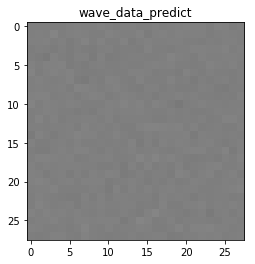

In [5]:
plt.figure(1)
plt.title('wave_data_predict')
plt.imshow(temp)
plt.show()

In [10]:
disc.predict([z])

InvalidArgumentError: You must feed a value for placeholder tensor 'disc_input/X' with dtype float
	 [[Node: disc_input/X = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Discriminator/FullyConnected_1/Sigmoid/_47 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_16_Discriminator/FullyConnected_1/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'disc_input/X', defined at:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.4/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.4/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-e539cc41bad3>", line 27, in <module>
    disc_input = tflearn.input_data(shape=[None, 784], name='disc_input')
  File "/usr/local/lib/python3.4/dist-packages/tflearn/layers/core.py", line 81, in input_data
    placeholder = tf.placeholder(shape=shape, dtype=dtype, name="X")
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/ops/array_ops.py", line 1507, in placeholder
    name=name)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'disc_input/X' with dtype float
	 [[Node: disc_input/X = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Discriminator/FullyConnected_1/Sigmoid/_47 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_16_Discriminator/FullyConnected_1/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
